# Boston House Prices Dataset

In [1]:
import pandas as pd

import numpy as np

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

## Chargement du jeu de données

In [2]:
dataset = load_boston()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Préparation des données

In [4]:
X = dataset.data

In [5]:
X.shape

(506, 13)

In [6]:
y = dataset.target

In [7]:
y.shape

(506,)

## Partitionnement des données

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
X_train.shape

(404, 13)

In [10]:
y_train.shape

(404,)

In [11]:
X_test.shape

(102, 13)

In [12]:
y_test.shape

(102,)

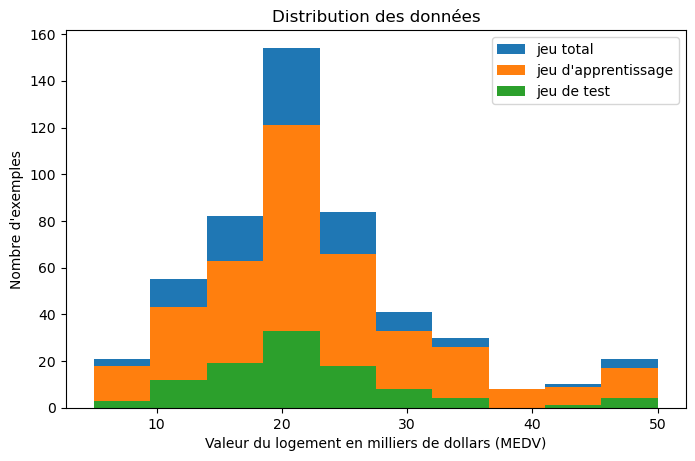

In [13]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Distribution des données")
plt.hist(y, label="jeu total")
plt.hist(y_train, label="jeu d'apprentissage")
plt.hist(y_test, label="jeu de test")
plt.xlabel("Valeur du logement en milliers de dollars (MEDV)")
plt.ylabel("Nombre d'exemples")
plt.legend()
plt.show()

## Features Scaling

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

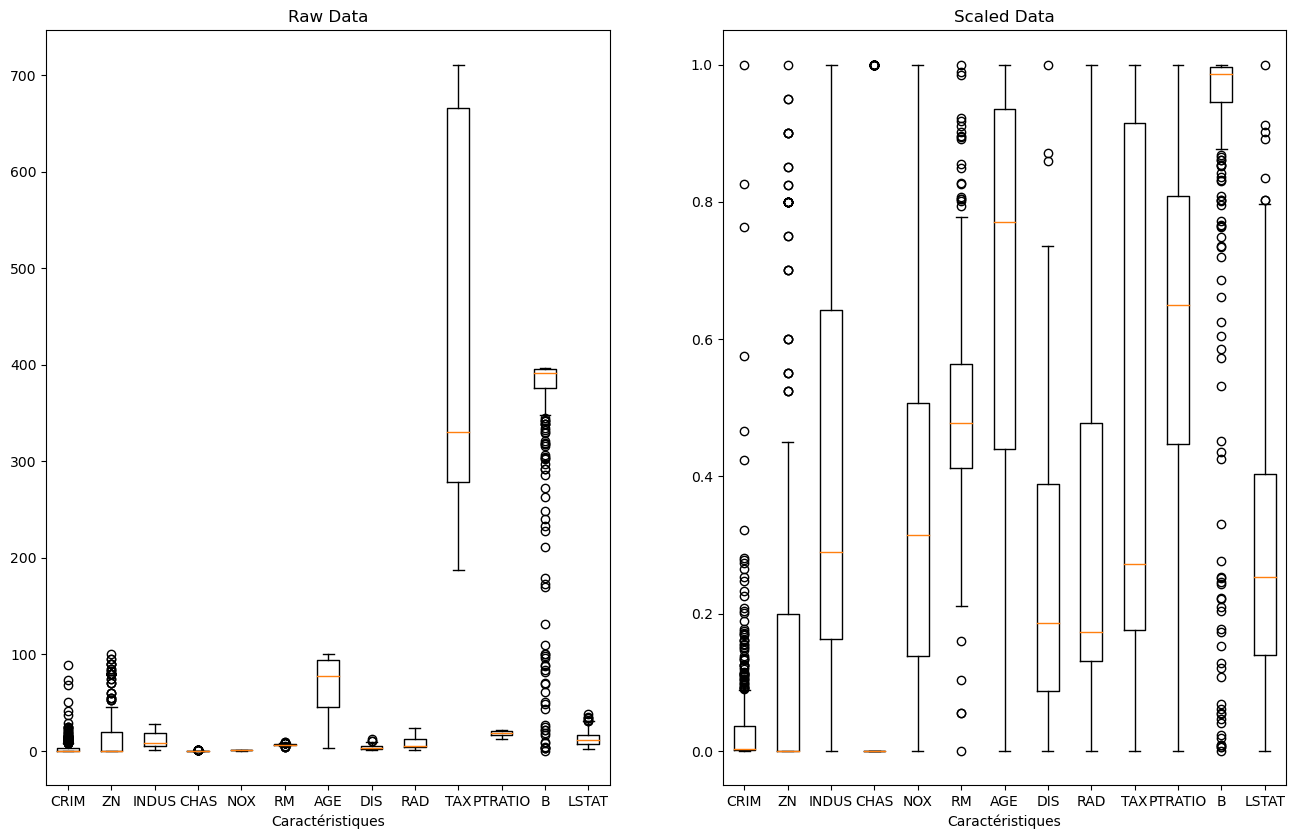

In [17]:
plt.figure(figsize=(16, 10), dpi=100)

plt.subplot(1, 2, 1)
plt.title('Raw Data')
plt.boxplot(X_train)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], labels=dataset['feature_names'])
plt.xlabel('Caractéristiques')

plt.subplot(1, 2, 2)
plt.title('Scaled Data')
plt.boxplot(scaled_X_train)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], labels=dataset['feature_names'])
plt.xlabel('Caractéristiques')

plt.show()

## Entrainement du modèle

In [45]:
hyperparameters = {'hidden_layer_sizes': [(1,), (3,), (5,), (7,)], 'activation': ['logistic', 'tanh', 'relu']}

In [19]:
model = MLPRegressor(solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

In [20]:
gridSearchCV = GridSearchCV(model,
                            hyperparameters,
                            n_jobs=-1,
                            refit=True,
                            cv=4,
                            return_train_score=True)

gridSearchCV.fit(scaled_X_train, y_train)

GridSearchCV(cv=4,
             estimator=MLPRegressor(max_iter=10000, random_state=0,
                                    solver='lbfgs'),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (3,), (5,), (7,)]},
             return_train_score=True)

In [39]:
hyperparameters = {'hidden_layer_sizes': [(1,), (3,), (5,), (7,), (9,)], 'activation': ['logistic', 'tanh', 'relu', 'identity’, ‘tanh’, ‘relu’]}

SyntaxError: EOL while scanning string literal (3923382546.py, line 1)

In [21]:
gridSearchCV.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (5,)}

In [22]:
pd.DataFrame(gridSearchCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.277010,0.043998,0.000748,4.320522e-04,logistic,"(1,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.826782,0.711669,0.842931,0.750673,0.783014,0.053949,7,8.146304e-01,8.411116e-01,8.046901e-01,8.359680e-01,8.241000e-01,1.497215e-02
1,2.726460,1.527027,0.000997,8.150813e-07,logistic,"(3,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.858367,0.711247,0.730065,0.819222,0.779725,0.061033,9,9.296769e-01,8.807048e-01,9.135688e-01,9.335583e-01,9.143772e-01,2.083555e-02
2,4.701432,3.525468,0.004734,7.067116e-03,logistic,"(5,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.855869,0.765174,0.826193,0.788227,0.808866,0.034801,4,9.242951e-01,8.951455e-01,9.228055e-01,9.363521e-01,9.196495e-01,1.509111e-02
3,7.712376,1.051403,0.001746,1.295365e-03,logistic,"(7,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.778921,0.734877,0.815684,0.801303,0.782696,0.030559,8,9.711131e-01,9.603845e-01,9.697891e-01,9.597514e-01,9.652595e-01,5.217473e-03
4,0.004988,0.001221,0.000748,4.317769e-04,tanh,"(1,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",-0.021861,-0.006522,-0.005317,-0.000586,-0.008572,0.007987,11,-2.005063e-13,-1.498801e-13,-2.173817e-13,-2.369216e-13,-2.011724e-13,3.229585e-14
5,0.254818,0.009986,0.000749,4.324310e-04,tanh,"(3,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.826812,0.712009,0.842701,0.750751,0.783068,0.053767,6,8.148548e-01,8.411710e-01,8.049781e-01,8.361801e-01,8.242960e-01,1.490229e-02
6,3.223630,2.390074,0.000499,4.988313e-04,tanh,"(5,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.860397,0.775567,0.832886,0.803704,0.818139,0.031717,3,9.322361e-01,9.096129e-01,8.495927e-01,8.575133e-01,8.872388e-01,3.473539e-02
7,5.136763,0.337592,0.000748,4.316395e-04,tanh,"(7,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.805255,0.772154,0.892151,0.808821,0.819595,0.044263,2,9.029626e-01,8.948585e-01,8.817355e-01,9.304538e-01,9.025026e-01,1.782684e-02
8,0.004737,0.000432,0.000499,4.990697e-04,relu,"(1,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-0.021862,-0.006522,-0.005317,-0.000586,-0.008572,0.007987,12,-2.886580e-15,-2.442491e-15,-8.659740e-15,-2.886580e-15,-4.218847e-15,2.570352e-15
9,0.608124,0.144844,0.000998,2.665601e-07,relu,"(3,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.824494,0.730481,0.605080,0.779526,0.734895,0.081993,10,8.286240e-01,8.577304e-01,7.875205e-01,9.205311e-01,8.486015e-01,4.844379e-02


## Evaluation des performances du modèle sur le jeu d'apprentissage

In [23]:
y_predict_train = gridSearchCV.best_estimator_.predict(scaled_X_train)

## Erreur quadratique moyenne

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [24]:
MSE_train = mean_squared_error(y_train, y_predict_train)

In [25]:
print("L'erreur quadratique moyenne vaut :", MSE_train.round(2))

L'erreur quadratique moyenne vaut : 7.12


## Racine carrée de l'erreur quadratique moyenne

$ RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}} $

In [26]:
RMSE_train = mean_squared_error(y_train, y_predict_train, squared=False)

In [27]:
print("La racine carrée de l'erreur quadratique moyenne vaut :", RMSE_train.round(2))

La racine carrée de l'erreur quadratique moyenne vaut : 2.67


## Coefficient de détermination

$ R^{2} = 1 - \displaystyle\frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}} $

In [28]:
R_squared_train = 1.0 - (np.sum((y_train - y_predict_train)**2) / np.sum((y_train - np.mean(y_train))**2))

In [29]:
print("Le coefficient de détermination vaut :", R_squared_train.round(4))

Le coefficient de détermination vaut : 0.9181


## Droite de régression

$ y = a * x + b $

In [30]:
a_train, b_train = np.polyfit(y_train, y_predict_train, 1)

In [31]:
print("Le coefficient directeur de la droite vaut :", a_train.round(2))

Le coefficient directeur de la droite vaut : 0.92


In [32]:
print("L'ordonnée à l'origine de la droite vaut:", b_train.round(2))

L'ordonnée à l'origine de la droite vaut: 1.87


## Synthèse des performances du modèle sur le jeu d'apprentissage

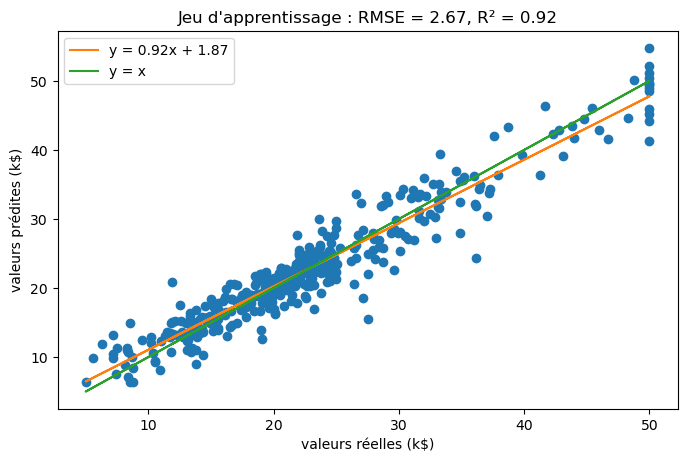

In [33]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu d'apprentissage : RMSE = " + str(RMSE_train.round(2)) + ", R² = " + str(R_squared_train.round(2)))
plt.plot(y_train, y_predict_train, 'o')
plt.plot(y_train, a_train * y_train + b_train, label="y = " + str(a_train.round(2)) + "x + " + str(b_train.round(2)))
plt.plot(y_train, y_train, label="y = x")
plt.xlabel("valeurs réelles (k$)")
plt.ylabel("valeurs prédites (k$)")
plt.legend()
plt.show()

## Evaluation des performances du modèle sur le jeu de test

In [34]:
y_predict_test = gridSearchCV.best_estimator_.predict(scaled_X_test)

## Erreur quadratique moyenne

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [35]:
MSE_test = mean_squared_error(y_test, y_predict_test)

In [36]:
print("L'erreur quadratique moyenne vaut :", MSE_test.round(2))

L'erreur quadratique moyenne vaut : 10.58


## Racine carrée de l'erreur quadratique moyenne

$ RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}} $

In [37]:
RMSE_test = mean_squared_error(y_test, y_predict_test, squared=False)

In [38]:
print("La racine carrée de l'erreur quadratique moyenne vaut :", RMSE_test.round(2))

La racine carrée de l'erreur quadratique moyenne vaut : 3.25


## Coefficient de détermination

$ R^{2} = 1 - \displaystyle\frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}} $

In [39]:
R_squared_test = 1.0 - (np.sum((y_test - y_predict_test)**2) / np.sum((y_test - np.mean(y_test))**2))

In [40]:
print("Le coefficient de détermination vaut :", R_squared_test.round(4))

Le coefficient de détermination vaut : 0.8558


## Droite de régression

$ y = a * x + b $

In [41]:
a_test, b_test = np.polyfit(y_test, y_predict_test, 1)

In [42]:
print("Le coefficient directeur de la droite vaut :", a_test.round(2))

Le coefficient directeur de la droite vaut : 0.88


In [43]:
print("L'ordonnée à l'origine de la droite vaut:", b_test.round(2))

L'ordonnée à l'origine de la droite vaut: 2.56


## Synthèse des performances du modèle sur le jeu de test

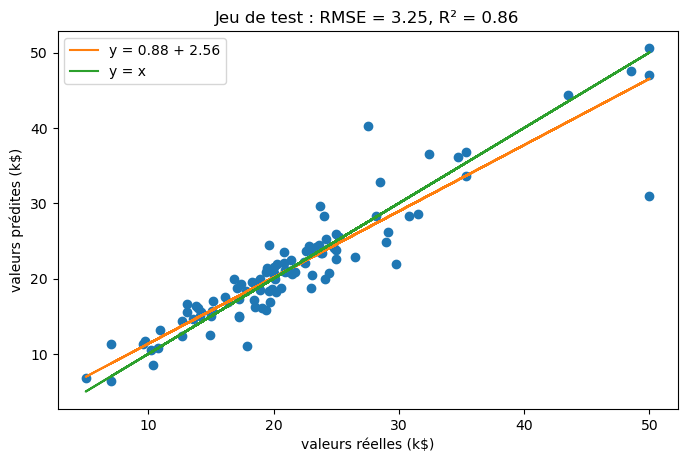

In [44]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu de test : RMSE = " + str(RMSE_test.round(2)) + ", R² = " + str(R_squared_test.round(2)))
plt.plot(y_test, y_predict_test, 'o')
plt.plot(y_test, a_test * y_test + b_test, label="y = " + str(a_test.round(2)) + " + " + str(b_test.round(2)))
plt.plot(y_test, y_test, label="y = x")
plt.xlabel("valeurs réelles (k$)")
plt.ylabel("valeurs prédites (k$)")
plt.legend()
plt.show()